### Datathon | Pós Data Analytics Fase 5 | Leonardo Dionello - RM358380

#### Análise Exploratória dos Dados (AED)

In [1]:
# Bilbiotecas necessárias para a análise inicial da base
import pandas as pd
import json
import re
import unidecode

##### Criação de um dataframe com lista de palavras técnicas para a área de TI, a fim de realiza uma busca via Regex no campo CV

In [2]:
palavras_chave = [
    # Linguagens de Programação
    'python', 'java', 'javascript', 'c++', 'c#', 'php', 'ruby', 'go', 'rust', 'kotlin',
    'swift', 'typescript', 'matlab', 'scala', 'perl', 'cobol', 'fortran', 'pascal',
    'visual basic', 'vba', 'objective-c', 'dart', 'julia', 'erlang', 'haskell', 'clojure',
    'f#', 'groovy', 'lua', 'assembly', 'delphi', 'vb.net', 'powershell',
    
    # Bancos de Dados
    'sql', 'mysql', 'postgresql', 'oracle', 'sql server', 'mongodb', 'redis', 'cassandra',
    'elasticsearch', 'sqlite', 'mariadb', 'dynamodb', 'neo4j', 'couchdb', 'influxdb',
    'firebase', 'snowflake', 'bigquery', 'redshift', 'teradata', 'db2', 'sybase',
    'banco de dados', 'nosql', 'acid', 'oltp', 'olap', 'data warehouse', 'etl',
    
    # Cloud Computing
    'aws', 'azure', 'google cloud', 'gcp', 'cloud computing', 'ec2', 's3', 'lambda',
    'docker', 'kubernetes', 'terraform', 'ansible', 'chef', 'puppet', 'jenkins',
    'gitlab ci', 'github actions', 'devops', 'ci/cd', 'iac', 'serverless', 'microservices',
    'containerização', 'orquestração', 'saas', 'paas', 'iaas',
    
    # Ferramentas Microsoft Office
    'excel', 'word', 'powerpoint', 'outlook', 'access', 'visio', 'project', 'teams',
    'sharepoint', 'onedrive', 'office 365', 'microsoft 365', 'power apps', 'power automate',
    
    # Business Intelligence e Analytics
    'power bi', 'tableau', 'qlik', 'looker', 'dax', 'power query', 'ssis', 'ssas', 'ssrs',
    'pentaho', 'cognos', 'microstrategy', 'spotfire', 'alteryx', 'knime', 'talend',
    'data analytics', 'business intelligence', 'bi', 'kpi', 'dashboard', 'relatórios',
    'etl', 'elt', 'data mining', 'olap', 'cubo', 'dimensão', 'fato',
    
    # Big Data e Data Science
    'big data', 'hadoop', 'spark', 'kafka', 'storm', 'hive', 'pig', 'hbase', 'zookeeper',
    'data science', 'machine learning', 'deep learning', 'ai', 'inteligência artificial',
    'neural networks', 'redes neurais', 'tensorflow', 'pytorch', 'scikit-learn', 'pandas',
    'numpy', 'matplotlib', 'seaborn', 'plotly', 'jupyter', 'anaconda', 'spyder',
    'data lake', 'data warehouse', 'data mart', 'data pipeline', 'streaming',
    
    # Sistemas Operacionais
    'linux', 'windows', 'macos', 'unix', 'ubuntu', 'centos', 'red hat', 'debian',
    'fedora', 'suse', 'android', 'ios', 'shell script', 'bash', 'cmd', 'powershell',
    'virtualização', 'vmware', 'hyper-v', 'virtualbox',
    
    # Redes e Segurança
    'tcp/ip', 'dns', 'dhcp', 'vpn', 'firewall', 'ips', 'ids', 'ssl', 'tls', 'https',
    'cibersegurança', 'segurança da informação', 'ethical hacking', 'penetration testing',
    'cryptografia', 'blockchain', 'cisco', 'juniper', 'fortinet', 'palo alto',
    'wi-fi', 'lan', 'wan', 'vlan', 'routing', 'switching', 'load balancer',
    
    # Desenvolvimento Web
    'html', 'css', 'react', 'angular', 'vue.js', 'node.js', 'express', 'django',
    'flask', 'spring', 'laravel', 'bootstrap', 'jquery', 'ajax', 'rest api',
    'graphql', 'soap', 'json', 'xml', 'mvc', 'orm', 'crud', 'frontend', 'backend',
    'full stack', 'responsive design', 'sass', 'less', 'webpack', 'npm', 'yarn',
    
    # Metodologias e Frameworks
    'agile', 'scrum', 'kanban', 'lean', 'waterfall', 'devops', 'itil', 'cobit',
    'pmbok', 'prince2', 'six sigma', 'design thinking', 'ux/ui', 'user experience',
    'user interface', 'wireframe', 'prototype', 'mockup',
    
    # ERP e Sistemas Empresariais
    'sap', 'oracle erp', 'microsoft dynamics', 'peoplesoft', 'jd edwards', 'workday',
    'salesforce', 'crm', 'erp', 'scm', 'wms', 'mes', 'bi', 'bpm', 'workflow',
    'enterprise architecture', 'togaf', 'zachman',
    
    # Testes e Qualidade
    'teste de software', 'qa', 'qc', 'selenium', 'junit', 'testng', 'cucumber',
    'postman', 'soap ui', 'jmeter', 'load testing', 'performance testing',
    'automation testing', 'manual testing', 'bug tracking', 'jira', 'bugzilla',
    
    # Versionamento e Colaboração
    'git', 'github', 'gitlab', 'bitbucket', 'svn', 'mercurial', 'azure devops',
    'version control', 'branching', 'merging', 'pull request', 'code review',
    
    # IoT e Tecnologias Emergentes
    'iot', 'internet das coisas', 'arduino', 'raspberry pi', 'mqtt', 'edge computing',
    'realidade aumentada', 'realidade virtual', '5g', 'blockchain',
    'smart city', 'industria 4.0', 'digital twin', 'quantum computing',
    
    # Governança e Compliance
    'lgpd', 'gdpr', 'sox', 'iso 27001', 'iso 20000', 'pci dss', 'hipaa',
    'governança de ti', 'compliance', 'auditoria', 'gestão de riscos',
    'continuidade de negócios', 'disaster recovery', 'backup',
    
    # Certificações
    'cissp', 'cism', 'cisa', 'pmp', 'itil foundation', 'aws certified',
    'azure certified', 'google cloud certified', 'oracle certified',
    'microsoft certified', 'cisco certified', 'comptia', 'cissp',
    
    # Ferramentas e Tecnologias Diversas
    'api', 'webhook', 'microservices', 'soap', 'rest', 'graphql', 'grpc',
    'message queue', 'redis', 'memcached', 'nginx', 'apache', 'iis',
    'load balancer', 'cdn', 'cache', 'session', 'cookies', 'jwt',
    'oauth', 'saml', 'ldap', 'active directory', 'single sign-on', 'sso'
]

# Função para categorizar automaticamente (método mais simples)
def categorizar_palavra(palavra):
    palavra_lower = palavra.lower()
    
    # Linguagens de Programação
    linguagens = ['python', 'java', 'javascript', 'c++', 'c#', 'php', 'ruby', 'go', 'rust', 'kotlin', 
                 'swift', 'typescript', 'r', 'matlab', 'scala', 'perl', 'cobol', 'fortran', 'pascal',
                 'visual basic', 'vba', 'objective-c', 'dart', 'julia', 'erlang', 'haskell', 'clojure',
                 'f#', 'groovy', 'lua', 'assembly', 'delphi', 'vb.net', 'powershell', 'html', 'css']
    
    # Bancos de Dados
    bd = ['sql', 'mysql', 'postgresql', 'oracle', 'sql server', 'mongodb', 'redis', 'cassandra',
          'elasticsearch', 'sqlite', 'mariadb', 'dynamodb', 'neo4j', 'couchdb', 'influxdb',
          'firebase', 'snowflake', 'bigquery', 'redshift', 'teradata', 'db2', 'sybase', 'banco de dados', 'nosql']
    
    # Cloud
    cloud = ['aws', 'azure', 'google cloud', 'gcp', 'cloud computing', 'ec2', 's3', 'lambda',
             'docker', 'kubernetes', 'serverless', 'saas', 'paas', 'iaas']
    
    # Microsoft Office
    office = ['excel', 'word', 'powerpoint', 'outlook', 'access', 'visio', 'project', 'teams',
              'sharepoint', 'onedrive', 'office 365', 'microsoft 365']
    
    # BI e Analytics
    bi = ['power bi', 'tableau', 'qlik', 'looker', 'dax', 'power query', 'business intelligence', 'bi', 'dashboard']
    
    # Data Science
    ds = ['data science', 'machine learning', 'deep learning', 'ai', 'tensorflow', 'pytorch', 'pandas', 'numpy']
    
    # Sistemas Operacionais
    so = ['linux', 'windows', 'macos', 'unix', 'ubuntu', 'centos', 'android', 'ios']
    
    # Determinar categoria
    if any(ling in palavra_lower for ling in linguagens):
        return 'Linguagem de Programação'
    elif any(b in palavra_lower for b in bd):
        return 'Banco de Dados'
    elif any(c in palavra_lower for c in cloud):
        return 'Cloud Computing'
    elif any(o in palavra_lower for o in office):
        return 'Microsoft Office'
    elif any(b in palavra_lower for b in bi):
        return 'BI e Analytics'
    elif any(d in palavra_lower for d in ds):
        return 'Data Science'
    elif any(s in palavra_lower for s in so):
        return 'Sistema Operacional'
    else:
        return 'Outras Tecnologias'

df_palavras_chave = pd.DataFrame({
    'palavra_chave': palavras_chave
})

df_palavras_chave['categoria'] = df_palavras_chave['palavra_chave'].apply(categorizar_palavra)

In [3]:
# Função para procurar as palavras chaves na coluna do CV
def extrair_keywords(texto, palavras_chave):
    if not texto:
        return []
    texto_limpo = unidecode.unidecode(texto.lower())
    texto_limpo = re.sub(r'[^a-z0-9\s]', '', texto_limpo)
    encontradas = [p for p in palavras_chave if p in texto_limpo]
    return encontradas

In [4]:
# Carregar JSONs
with open('Datathon Decision/applicants.json', 'r', encoding='utf-8') as f:
    applicants = json.load(f)

with open('Datathon Decision/prospects.json', 'r', encoding='utf-8') as f:
    prospects = json.load(f)

with open('Datathon Decision/vagas.json', 'r', encoding='utf-8') as f:
    vagas = json.load(f)

In [5]:
# Prospects em DataFrame com keywords
prospects_list = []
for cod_vaga, vaga in prospects.items():
    for p in vaga.get('prospects', []):
        comentario = p.get('comentario', '')
        prospects_list.append({
            'codigo_vaga': cod_vaga,
            'codigo_profissional': p.get('codigo'),
            'situacao_candidato': p.get('situacao_candidado'),
            'comentario': comentario,
            'keywords_comentario': extrair_keywords(comentario, palavras_chave)
        })
        
df_prospects = pd.DataFrame(prospects_list)

In [6]:
# Vagas em DataFrame
vagas_list = []
for cod, v in vagas.items():
    info = v.get('informacoes_basicas', {})
    perfil = v.get('perfil_vaga', {})
    competencia = perfil.get('competencia_tecnicas_e_comportamentais', '')
    
    vagas_list.append({
        'codigo_vaga': cod,
        'titulo_vaga': info.get('titulo_vaga'),
        'cliente': info.get('cliente'),
        'tipo_contratacao': info.get('tipo_contratacao'),
        'cidade_vaga': perfil.get('cidade'),
        'areas_atuacao_vaga': perfil.get('areas_atuacao'),
        'nivel_profissional': perfil.get('nivel profissional'),
        'nivel_ingles_vaga': perfil.get('nivel_ingles'),
        'nivel_espanhol_vaga': perfil.get('nivel_espanhol'),
        'competencia_vaga': competencia,
        'keywords_vaga': extrair_keywords(competencia, palavras_chave)
    })

df_vagas = pd.DataFrame(vagas_list)


In [7]:
# Convertendo applicants para DataFrame
applicants_list = []
for id_app, app in applicants.items():
    basic = app.get('infos_basicas', {})
    prof = app.get('informacoes_profissionais', {})
    formacao = app.get('formacao_e_idiomas', {})
    cv = app.get('cv_pt', '')
    
    applicants_list.append({
        'codigo_profissional': basic.get('codigo_profissional'),
        'nome': basic.get('nome'),
        'objetivo_profissional': basic.get('objetivo_profissional'),
        'nivel_academico': formacao.get('nivel_academico'),
        'nivel_ingles': formacao.get('nivel_ingles'),
        'nivel_espanhol': formacao.get('nivel_espanhol'),
        'area_atuacao': prof.get('area_atuacao'),
        'remuneracao': prof.get('remuneracao'),
        'keywords_encontradas': extrair_keywords(cv, palavras_chave)
    })

df_applicants = pd.DataFrame(applicants_list)

In [8]:
# Merge Applicants + Prospects + vagas
df_merged = df_prospects.merge(df_applicants, on='codigo_profissional', how='left')
df_merged = df_merged.merge(df_vagas, on='codigo_vaga', how='left')

# Cria a variável target
df_merged['target'] = df_merged['situacao_candidato'].apply(lambda x: 1 if (x == 'Contratado pela Decision') | 
                                                            (x == 'Encaminhado ao Requisitante') else 0)

In [9]:
df_merged.isnull().sum()

codigo_vaga                 0
codigo_profissional         0
situacao_candidato          0
comentario                  0
keywords_comentario         0
nome                     8664
objetivo_profissional    8664
nivel_academico          8664
nivel_ingles             8664
nivel_espanhol           8664
area_atuacao             8664
remuneracao              8664
keywords_encontradas     8664
titulo_vaga                24
cliente                    24
tipo_contratacao           24
cidade_vaga                24
areas_atuacao_vaga         24
nivel_profissional         24
nivel_ingles_vaga          24
nivel_espanhol_vaga        24
competencia_vaga           24
keywords_vaga              24
target                      0
dtype: int64

##### Para melhorar a performance do modelo, estou deletando todas as linhas que possua a coluna keywords_encontradas vazias.
##### Essa coluna é baseada nas palavras chaves que foram encontradas na coluna CV

In [10]:
# Removendo linhas vazias
df_merged = df_merged.dropna(subset=['keywords_encontradas'])
df_merged = df_merged[df_merged['keywords_encontradas'].str.strip() != '']

df_merged = df_merged.dropna(subset=['titulo_vaga'])
df_merged = df_merged[df_merged['titulo_vaga'].str.strip() != '']

df_merged.isnull().sum()

codigo_vaga              0
codigo_profissional      0
situacao_candidato       0
comentario               0
keywords_comentario      0
nome                     0
objetivo_profissional    0
nivel_academico          0
nivel_ingles             0
nivel_espanhol           0
area_atuacao             0
remuneracao              0
keywords_encontradas     0
titulo_vaga              0
cliente                  0
tipo_contratacao         0
cidade_vaga              0
areas_atuacao_vaga       0
nivel_profissional       0
nivel_ingles_vaga        0
nivel_espanhol_vaga      0
competencia_vaga         0
keywords_vaga            0
target                   0
dtype: int64

In [11]:
print(f"Total de linhas no Dataframe, após a retirada de campos vazios: {len(df_merged)}")

Total de linhas no Dataframe, após a retirada de campos vazios: 45071


In [12]:
df_merged.head(2)

,codigo_vaga,codigo_profissional,situacao_candidato,comentario,keywords_comentario,nome,objetivo_profissional,nivel_academico,nivel_ingles,nivel_espanhol,...,cliente,tipo_contratacao,cidade_vaga,areas_atuacao_vaga,nivel_profissional,nivel_ingles_vaga,nivel_espanhol_vaga,competencia_vaga,keywords_vaga,target
0,4530,25632,Encaminhado ao Requisitante,"Encaminhado para - PJ R$ 72,00/hora",[],José Vieira,,,,,...,"Morris, Moran and Dodson",PJ/Autônomo,Rio de Janeiro,TI - Desenvolvimento/Programação-,Pleno,Nenhum,Nenhum,- Experiência comprovada em projetos de control-M,[],1
1,4530,25529,Encaminhado ao Requisitante,"encaminhado para - R$ 6.000,00 – CLT Full , n...",[],Srta. Isabela Cavalcante,ANALISTA DE REDES E TELEPROCESSAMENTO/INFRAEST...,Ensino Superior Completo,Intermediário,Básico,...,"Morris, Moran and Dodson",PJ/Autônomo,Rio de Janeiro,TI - Desenvolvimento/Programação-,Pleno,Nenhum,Nenhum,- Experiência comprovada em projetos de control-M,[],1


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Configura o estilo e tamanho padrão dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

C:\Users\leonardo\AppData\Local\Temp\ipykernel_24680\659054179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df_merged, palette='viridis', order=[0, 1])
C:\Users\leonardo\AppData\Local\Temp\ipykernel_24680\659054179.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não Selecionado', 'Selecionado'])


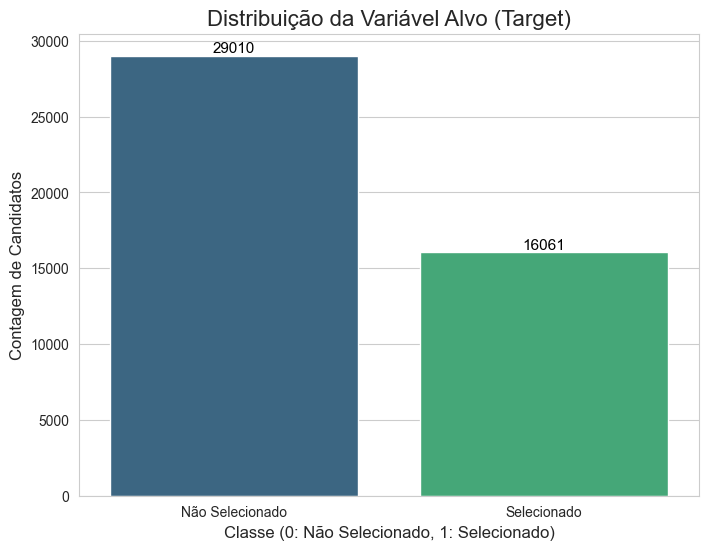

In [ ]:
# Gráfico de distribuição entre canditados contratados (1) e não contratados (0)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=df_merged, palette='viridis', order=[0, 1])
plt.title('Distribuição da Variável Alvo (Target)', fontsize=16)
plt.xlabel('Classe (0: Não Selecionado, 1: Selecionado)', fontsize=12)
plt.ylabel('Contagem de Candidatos', fontsize=12)
ax.set_xticklabels(['Não Selecionado', 'Selecionado'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

C:\Users\leonardo\AppData\Local\Temp\ipykernel_24680\501408624.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_counts.values, y=selected_counts.index, ax=axes[0], palette='Greens_r')
C:\Users\leonardo\AppData\Local\Temp\ipykernel_24680\501408624.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=not_selected_counts.values, y=not_selected_counts.index, ax=axes[1], palette='Reds_r')


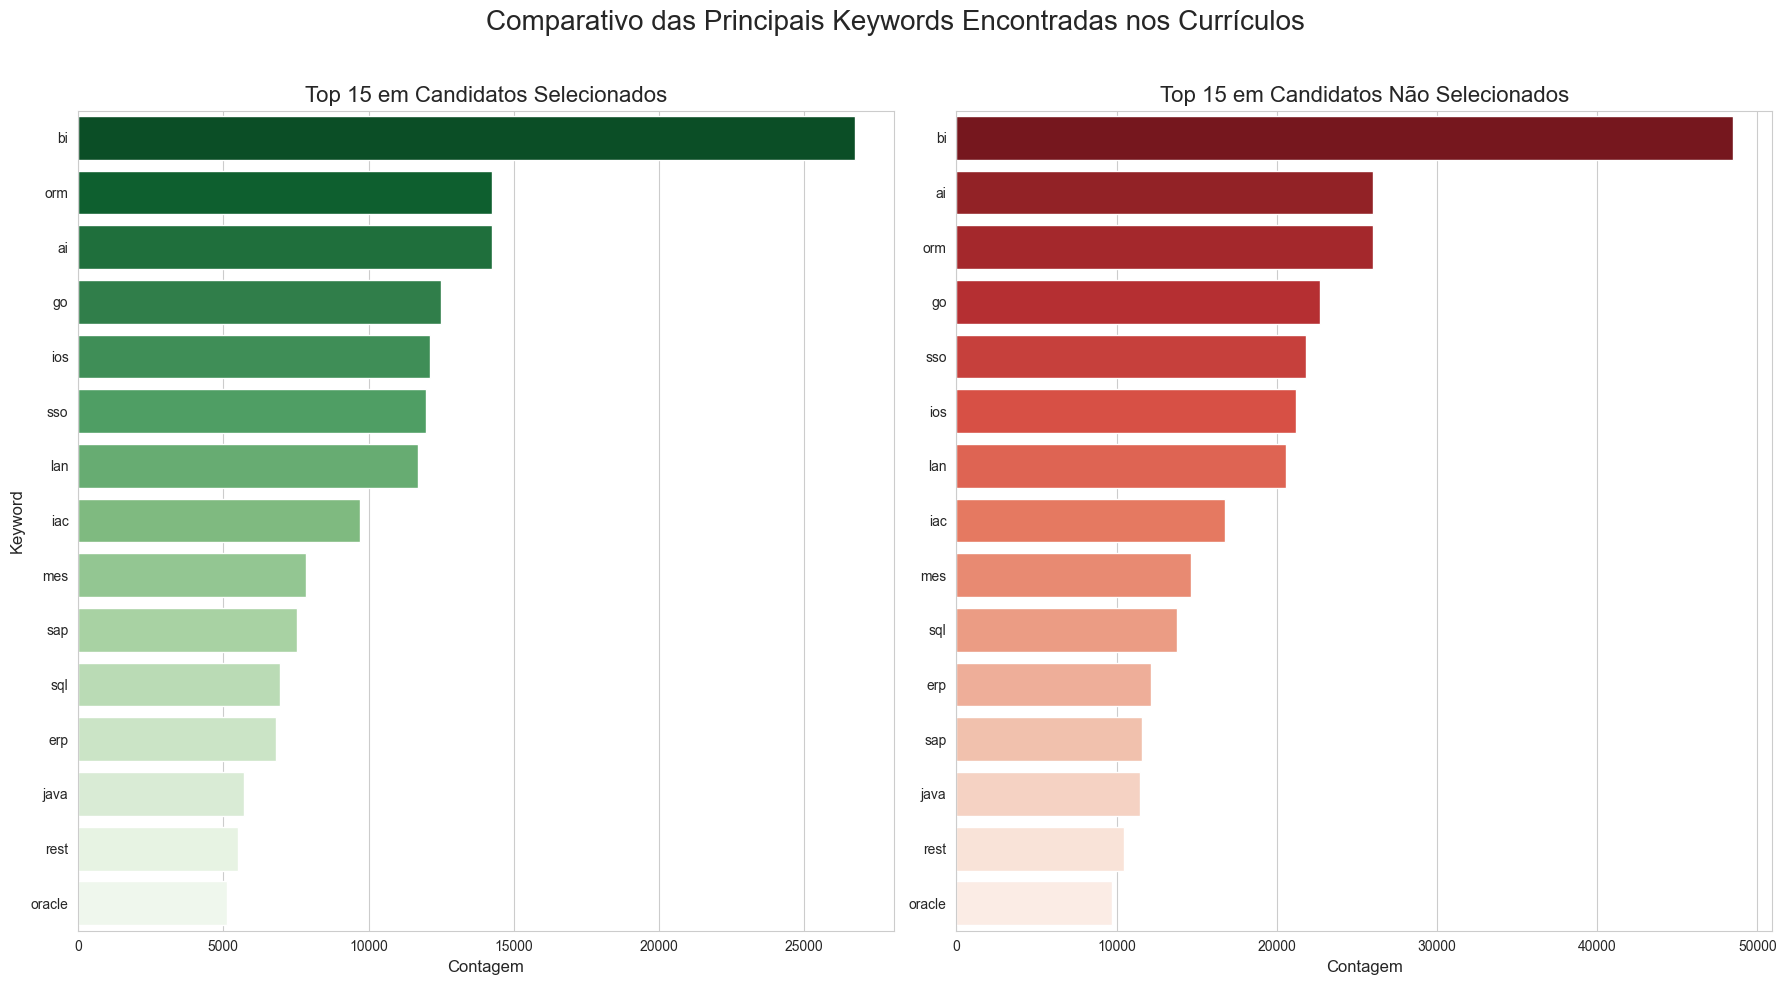

In [ ]:
# Gráfico com as principais Keywords no CV dos canditados contratados e não contratados
if 'keywords_encontradas' in df_merged.columns:
    df_keywords = df_merged.explode('keywords_encontradas')

    df_selected = df_keywords[df_keywords['target'] == 1]
    df_not_selected = df_keywords[df_keywords['target'] == 0]

    # Conta as keywords mais comuns em cada grupo
    top_n = 15
    selected_counts = df_selected['keywords_encontradas'].value_counts().nlargest(top_n)
    not_selected_counts = df_not_selected['keywords_encontradas'].value_counts().nlargest(top_n)

    # Cria os subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))
    fig.suptitle('Comparativo das Principais Keywords Encontradas nos Currículos', fontsize=20)

    # Gráfico para Selecionados
    sns.barplot(x=selected_counts.values, y=selected_counts.index, ax=axes[0], palette='Greens_r')
    axes[0].set_title(f'Top {top_n} em Candidatos Selecionados', fontsize=16)
    axes[0].set_xlabel('Contagem', fontsize=12)
    axes[0].set_ylabel('Keyword', fontsize=12)

    # Gráfico para Não Selecionados
    sns.barplot(x=not_selected_counts.values, y=not_selected_counts.index, ax=axes[1], palette='Reds_r')
    axes[1].set_title(f'Top {top_n} em Candidatos Não Selecionados', fontsize=16)
    axes[1].set_xlabel('Contagem', fontsize=12)
    axes[1].set_ylabel('')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

##### Avaliação de alguns modelos de ML para a previsão de contratação

In [14]:
# Bibliotecas necessárias para a análise do melhor modelo

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [15]:
# -------------------------
# Pré-processamento do DataFrame
# -------------------------

# Colunas de entrada
features_text = ['keywords_encontradas', 'keywords_vaga']
features_cat = ['nivel_academico', 'nivel_ingles', 'nivel_espanhol', 'area_atuacao', 'tipo_contratacao', 'nivel_profissional','cidade_vaga']
target = 'target'

# Converter listas de texto para string
for col in features_text:
    df_merged[col] = df_merged[col].apply(
        lambda x: ' '.join(x) if isinstance(x, list) else ''
    )

In [16]:
# -------------------------
# Divisão em treino e teste
# -------------------------

X = df_merged[features_text + features_cat]
y = df_merged[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
# -------------------------
# Pipeline de pré-processamento
# -------------------------

text_transformer = Pipeline(steps=[
    ('vect', CountVectorizer())  # ou TFIDFVectorizer() se quiser
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('text_keywords_encontradas', text_transformer, 'keywords_encontradas'),
        ('text_keywords_vaga', text_transformer, 'keywords_vaga'),
        ('cat', cat_transformer, features_cat)
    ])

In [18]:
# -------------------------
# Modelos e Pipeline de Treinamento
# -------------------------

modelos = {
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                             scale_pos_weight=3,max_depth=5,learning_rate=0.1,n_estimators=300,
                             subsample=0.8,colsample_bytree=0.8),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Guardar resultados
resultados = []

for nome, modelo in modelos.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', modelo)
    ])
    
    print(f"Treinando: {nome}")
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    
    report = classification_report(y_test, y_pred, output_dict=True)
    roc = roc_auc_score(y_test, y_proba)
    
    resultados.append({
        'Modelo': nome,
        'AUC ROC': round(roc, 4),
        'Precision (1)': round(report['1']['precision'], 4),
        'Recall (1)': round(report['1']['recall'], 4),
        'F1-Score (1)': round(report['1']['f1-score'], 4)
    })
    
    print(f"\nClassification Report para {nome}:\n", classification_report(y_test, y_pred))
    print(f"Confusion Matrix para {nome}:\n", confusion_matrix(y_test, y_pred))
    print(f"AUC ROC para {nome}: {roc:.4f}\n")

Treinando: LogisticRegression

Classification Report para LogisticRegression:
               precision    recall  f1-score   support

           0       0.74      0.58      0.65      5803
           1       0.45      0.63      0.53      3212

    accuracy                           0.60      9015
   macro avg       0.60      0.61      0.59      9015
weighted avg       0.64      0.60      0.61      9015

Confusion Matrix para LogisticRegression:
 [[3392 2411]
 [1202 2010]]
AUC ROC para LogisticRegression: 0.6484

Treinando: RandomForest

Classification Report para RandomForest:
               precision    recall  f1-score   support

           0       0.69      0.88      0.77      5803
           1       0.56      0.29      0.38      3212

    accuracy                           0.67      9015
   macro avg       0.63      0.58      0.58      9015
weighted avg       0.64      0.67      0.63      9015

Confusion Matrix para RandomForest:
 [[5086  717]
 [2292  920]]
AUC ROC para RandomForest

c:\Users\leonardo\Documents\00 - Projetos\03 - Python\01_VSProjects\Pos_F5\datathon_f5\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:49:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report para XGBoost:
               precision    recall  f1-score   support

           0       0.83      0.31      0.45      5803
           1       0.42      0.89      0.57      3212

    accuracy                           0.51      9015
   macro avg       0.62      0.60      0.51      9015
weighted avg       0.68      0.51      0.49      9015

Confusion Matrix para XGBoost:
 [[1793 4010]
 [ 364 2848]]
AUC ROC para XGBoost: 0.6804

Treinando: LightGBM
[LightGBM] [Info] Number of positive: 12849, number of negative: 23207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1558
[LightGBM] [Info] Number of data points in the train set: 36056, number of used features: 749
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356362 -> initscore=-0.591188
[LightGBM] [Info] Sta

c:\Users\leonardo\Documents\00 - Projetos\03 - Python\01_VSProjects\Pos_F5\datathon_f5\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Classification Report para LightGBM:
               precision    recall  f1-score   support

           0       0.68      0.94      0.79      5803
           1       0.64      0.19      0.30      3212

    accuracy                           0.67      9015
   macro avg       0.66      0.57      0.54      9015
weighted avg       0.66      0.67      0.61      9015

Confusion Matrix para LightGBM:
 [[5456  347]
 [2595  617]]
AUC ROC para LightGBM: 0.6801



c:\Users\leonardo\Documents\00 - Projetos\03 - Python\01_VSProjects\Pos_F5\datathon_f5\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Avaliação do modelo

* O Logistic Regression apresentou desempenho inferior, especialmente em recall e F1-score, sendo limitado para capturar relações complexas nos dados.

* O Random Forest mostrou bom recall para a classe majoritária, mas falhou em identificar corretamente a classe minoritária, o que é crítico no contexto do problema.

* O LightGBM teve um desempenho muito similar ao Random Forest, com recall baixo para a classe de interesse.

Já o XGBoost destacou-se por oferecer:

    * Melhor equilíbrio entre precision e recall, principalmente para a classe minoritária;
    * Melhor capacidade de generalização, mesmo em um dataset desbalanceado;
    * Melhor AUC ROC em relação aos outros modelos testados, atingindo 0.68, que representa um ganho significativo na capacidade preditiva.

In [19]:
text_transformer = Pipeline([('vect', CountVectorizer(max_features=1000))])
cat_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('text_encontradas', text_transformer, 'keywords_encontradas'),
    ('text_vaga', text_transformer, 'keywords_vaga'),
    ('cat', cat_transformer, ['nivel_academico', 'nivel_ingles','nivel_espanhol', 'area_atuacao', 'tipo_contratacao', 'nivel_profissional'])
])

# -------------------------
# Pipeline com XGBoost
# -------------------------

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

# -------------------------
# Grid de Hiperparâmetros
# -------------------------

param_grid = {
    'classifier__scale_pos_weight': [1, 3, 5, 7],
    'classifier__max_depth': [3, 4, 5],
    'classifier__subsample': [0.7, 0.8, 1.0]
}

# -------------------------
# GridSearch com validação cruzada
# -------------------------

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=3,  
    scoring='f1', 
    verbose=2,
    n_jobs=-1 
)
# -------------------------
# Treinar o GridSearch
# -------------------------

grid_search.fit(X_train, y_train)

# -------------------------
# Melhor Resultado
# -------------------------

print("Melhor combinação de parâmetros:", grid_search.best_params_)
print("Melhor score (F1):", round(grid_search.best_score_, 4))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\leonardo\Documents\00 - Projetos\03 - Python\01_VSProjects\Pos_F5\datathon_f5\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:50:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Melhor combinação de parâmetros: {'classifier__max_depth': 5, 'classifier__scale_pos_weight': 3, 'classifier__subsample': 1.0}
Melhor score (F1): 0.5455


In [20]:
# Modelo final com os melhores parâmetros
best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        max_depth=5,
        scale_pos_weight=3,
        subsample=1.0
    ))
])

# Treinar com todo X_train
best_model.fit(X_train, y_train)

# Avaliar no X_test
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print('AUC ROC:', roc_auc_score(y_test, y_proba))

c:\Users\leonardo\Documents\00 - Projetos\03 - Python\01_VSProjects\Pos_F5\datathon_f5\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:50:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.82      0.29      0.43      5803
           1       0.41      0.88      0.56      3212

    accuracy                           0.50      9015
   macro avg       0.61      0.59      0.49      9015
weighted avg       0.67      0.50      0.48      9015

AUC ROC: 0.6631317131238641


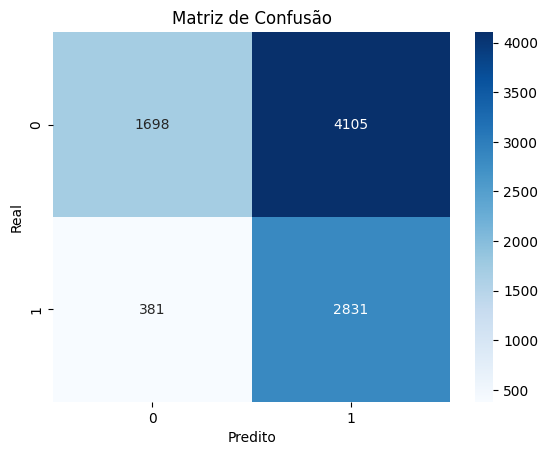

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

* 2831 verdadeiros positivos (classe 1 detectada corretamente) — O modelo conseguiu captar bem os casos de interesse

O modelo está priorizando não perder os positivos (classe 1)

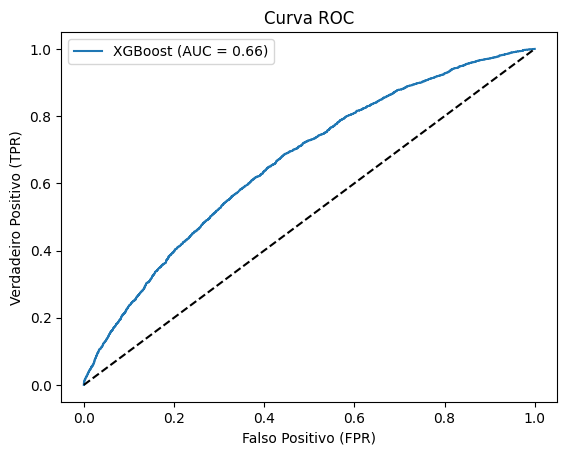

In [22]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falso Positivo (FPR)')
plt.ylabel('Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

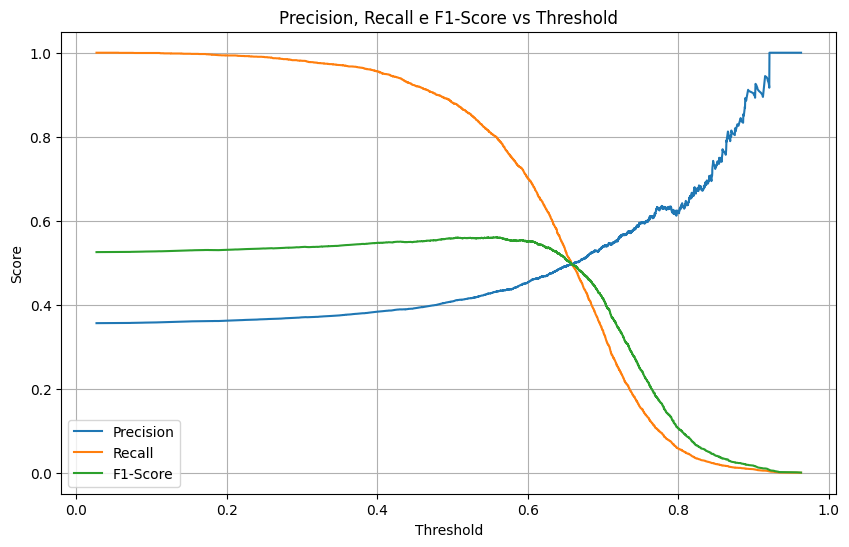

Melhor Threshold para F1-Score: 0.55


In [23]:
from sklearn.metrics import precision_recall_curve, f1_score

import matplotlib.pyplot as plt
import numpy as np

# Gerar probabilidades no conjunto de teste
y_proba = best_model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1-Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall e F1-Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Opcional: Visualizar melhor threshold de F1
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Melhor Threshold para F1-Score: {best_threshold:.2f}")

In [24]:
from sklearn.linear_model import LogisticRegression

# Treinar um LogisticRegression simples com o mesmo preprocessor
log_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

log_model.fit(X_train, y_train)

# Pegar as probabilidades das duas predições
proba_xgb = best_model.predict_proba(X_test)[:, 1]
proba_log = log_model.predict_proba(X_test)[:, 1]

# Média simples das duas probabilidades
ensemble_proba = (proba_xgb + proba_log) / 2

# Testar com threshold padrão 0.5
ensemble_pred = (ensemble_proba >= 0.5).astype(int)

# Avaliar ensemble
print(classification_report(y_test, ensemble_pred))
print('AUC ROC do Ensemble:', roc_auc_score(y_test, ensemble_proba))

              precision    recall  f1-score   support

           0       0.78      0.41      0.54      5803
           1       0.43      0.79      0.56      3212

    accuracy                           0.55      9015
   macro avg       0.61      0.60      0.55      9015
weighted avg       0.66      0.55      0.55      9015

AUC ROC do Ensemble: 0.6607239964127285


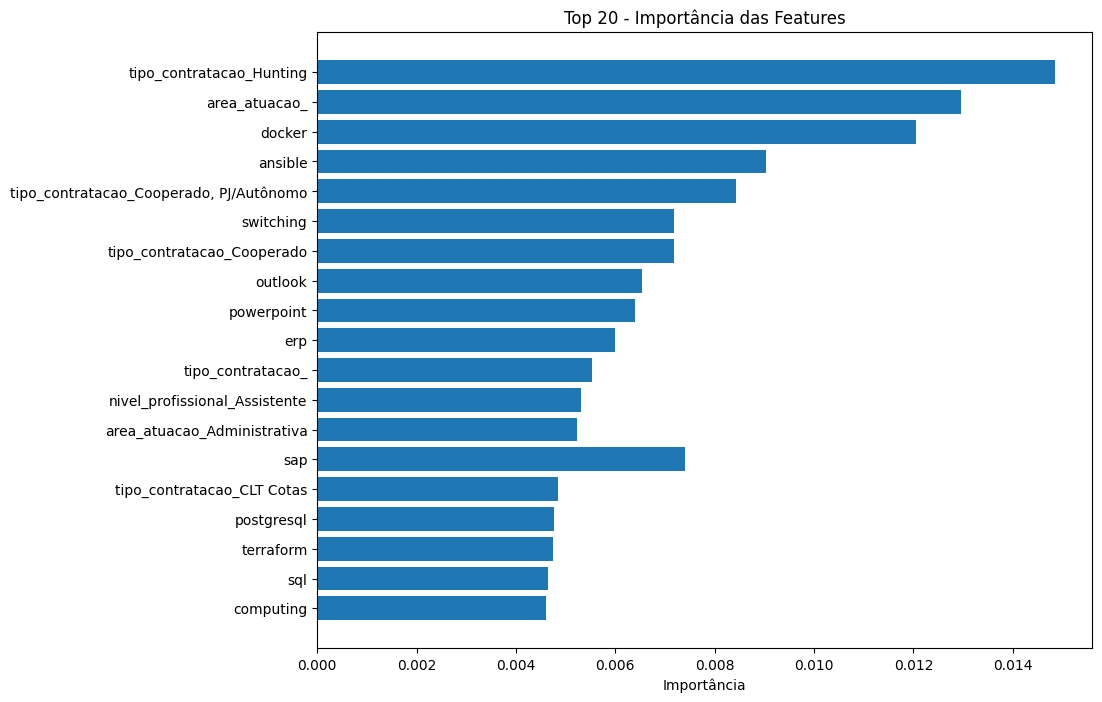

In [26]:
# Obter o modelo XGBClassifier do pipeline
xgb_model = best_model.named_steps['classifier']

# Obter os nomes das features do ColumnTransformer
ohe_features = best_model.named_steps['preprocessor'].transformers_[2][1].named_steps['onehot'].get_feature_names_out(['nivel_academico', 'nivel_ingles','nivel_espanhol', 'area_atuacao', 'tipo_contratacao', 'nivel_profissional'])

text_features = (
    best_model.named_steps['preprocessor'].transformers_[0][1].named_steps['vect'].get_feature_names_out().tolist() +
    best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['vect'].get_feature_names_out().tolist()
)

feature_names = list(text_features) + list(ohe_features)

# Feature importance do modelo
importances = xgb_model.feature_importances_

# DataFrame para visualizar ordenado
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plotar as 20 principais
plt.figure(figsize=(10, 8))
plt.barh(feat_imp_df['feature'][:20][::-1], feat_imp_df['importance'][:20][::-1])
plt.title('Top 20 - Importância das Features')
plt.xlabel('Importância')
plt.show()

In [27]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define o número de folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Avaliar usando a métrica de ROC AUC (pode mudar para f1, accuracy, etc.)
scores = cross_val_score(best_model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)

print(f"AUC ROC por Fold: {scores}")
print(f"Média AUC ROC: {scores.mean():.4f}")
print(f"Desvio Padrão: {scores.std():.4f}")


AUC ROC por Fold: [0.66006015 0.66466809 0.65248274 0.657917   0.66209791]
Média AUC ROC: 0.6594
Desvio Padrão: 0.0041


Conclusão da Modelagem

    O modelo final, baseado no algoritmo XGBoost, foi capaz de capturar os principais padrões dos candidatos com maior probabilidade de serem contratados.
    Após avaliação com validação cruzada (StratifiedKFold), o modelo apresentou uma AUC ROC média de 0,6594, com baixa variação entre os folds, demonstrando uma estabilidade e boa capacidade de generalização.

    Os principais fatores identificados como relevantes para a previsão foram as palavras-chave extraídas do currículo, características da vaga e nível acadêmico dos candidatos.

    Embora o desempenho seja adequado para um MVP, com mais estudos e testes o modelo poderá ser aprimorado com maior volume de dados e ajuste fino de hiperparâmetros.

In [25]:
df_merged.to_csv('arquivo.csv', index=False)